In [121]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [123]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [124]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment=PLAID_ENV)

client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': False,
   'input_spec': 'fixed',
   'institution_id': 'ins_25',
   'mfa': [],
   'mfa_code_type': 'numeric',
   'name': 'Ally Bank',
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': ['124003116']},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Login ID', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_113968',
   'mfa': ['questions'],
   'mfa_code_type': 'numeric',
   'name': 'Amegy Bank of Texas - Personal Banking',
   'products': ['assets', 'auth', 'balance', 'transactions', 'income'],
   'routing_numbers': ['113011258']}],
 'request_id': 'LT5zuGf7thQjYfZ',
 'total': 10

### 2. Generate a public token

In [125]:
INSTITUTION_ID = "ins_109508"
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])


### 3. Exchange the public token for an access token

In [126]:
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [127]:
account_info = client.Accounts.get(access_token)
account_info


{'accounts': [{'account_id': 'gWlzzBeg9mhrqDVezmZAhr91kJdGnecgom4v6',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '8Ey557LrK9UoVyNdBEq9f1kEDmGbnXIwnlKk1',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'EDlPPAxQekHQgwa5Ev9AiGmLdp9aWjcXyK9pQ',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [128]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)

print(json.dumps(transaction_response['transactions'][:5],indent=4, sort_keys=True))

[
    {
        "account_id": "WDqbbZExNPHqzKX5n7NQuoVyargKGXFlRmwJ8",
        "account_owner": null,
        "amount": 500,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2019-10-03",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
        "transaction

### 2. Print the categories for each transaction

In [129]:
for transaction in transaction_response['transactions']: 
    print(transaction['category'])

['Travel', 'Airlines and Aviation Services']
['Travel', 'Car Service', 'Ride Share']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Car Service', 'Ride Share']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [130]:
transaction_df= pd.DataFrame(columns=['date','name','amount','category'])

transactions= transaction_response['transactions']

for index, transaction in enumerate(transactions):
    transaction_df.loc[index] = [transaction['date'], transaction['name'],transaction['amount'], transaction['category'][0]]

transaction_df.head()

,date,name,amount,category
0,2019-10-03,United Airlines,500,Travel
1,2019-10-01,Uber 072515 SF**POOL**,6.33,Travel
2,2019-09-28,Tectra Inc,500,Food and Drink
3,2019-09-27,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2019-09-27,KFC,500,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [131]:
transaction_df['date'] = pd.to_datetime(transaction_df['date'])

transaction_df['amount'] = transaction_df['amount'].astype('float')

transaction_df.head()

,date,name,amount,category
0,2019-10-03,United Airlines,500.00,Travel
1,2019-10-01,Uber 072515 SF**POOL**,6.33,Travel
2,2019-09-28,Tectra Inc,500.00,Food and Drink
3,2019-09-27,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2019-09-27,KFC,500.00,Food and Drink


In [132]:
type(transaction_df['amount'])

pandas.core.series.Series

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [133]:
income_data= pd.DataFrame(client.Income.get(access_token))
income_data

,income,request_id
income_streams,"[{'confidence': 0.99, 'days': 690, 'monthly_in...",Rxyg3aeTwAZEgpH
last_year_income,6000,Rxyg3aeTwAZEgpH
last_year_income_before_tax,7285,Rxyg3aeTwAZEgpH
max_number_of_overlapping_income_streams,1,Rxyg3aeTwAZEgpH
number_of_income_streams,1,Rxyg3aeTwAZEgpH
projected_yearly_income,6085,Rxyg3aeTwAZEgpH
projected_yearly_income_before_tax,7389,Rxyg3aeTwAZEgpH


In [134]:
income_data['income']['income_streams']

[{'confidence': 0.99,
  'days': 690,
  'monthly_income': 500,
  'name': 'UNITED AIRLINES'}]

In [135]:
print(f"Previous year's gross income: {income_data['income']['last_year_income_before_tax']}")
print(f"Current monthly income: {income_data['income']['income_streams'][0]['monthly_income']}")
print(f"Projected Year's income: {income_data['income']['projected_yearly_income_before_tax']}")

Previous year's gross income: 7285
Current monthly income: 500
Projected Year's income: 7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [136]:
transaction_df_grp= transaction_df.loc[:,'amount':'category']
transaction_df_grp.head()

,amount,category
0,500.00,Travel
1,6.33,Travel
2,500.00,Food and Drink
3,2078.50,Payment
4,500.00,Food and Drink


In [137]:

expenses_per_category= transaction_df_grp.groupby('category').sum()
expenses_per_category

,amount
category,
Food and Drink,1105.73
Payment,2103.50
Recreation,78.50
Shops,500.00
Transfer,6845.78
Travel,11.73


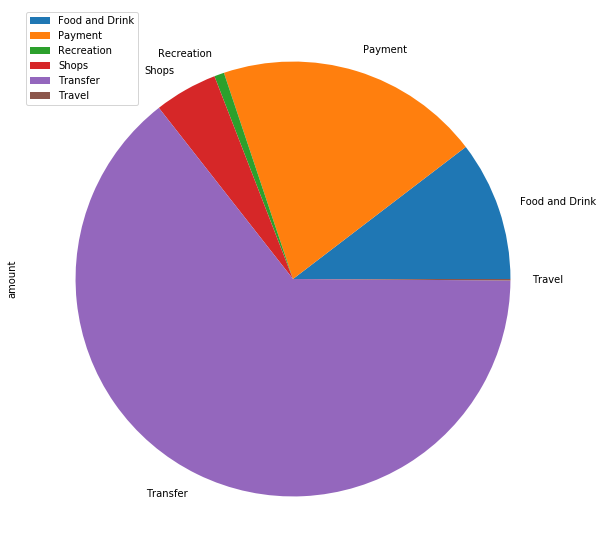

In [141]:
figure1= expenses_per_category.plot.pie(y='amount',figsize=(10,10))

### Calculate the expenses per month

In [104]:
transaction_df['month']=pd.DatetimeIndex(transaction_df['date']).month

expense_per_month= transaction_df.groupby('month').sum()
expense_per_month

,amount
month,
7,10138.91
8,10645.24
9,10645.24
10,506.33


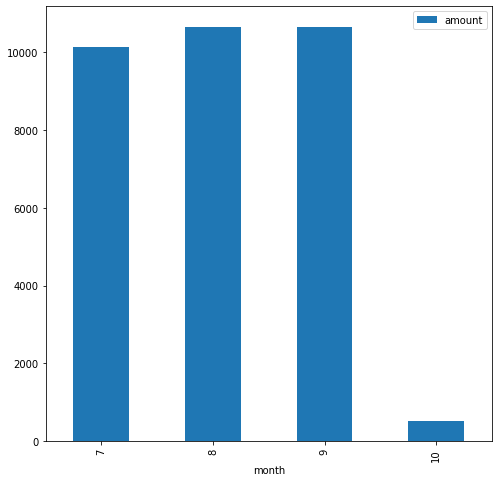

In [142]:
figure2= expense_per_month.plot.bar(figsize=(8,8))